In [106]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('salaires.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,22.0,34.818182,5.901060,26.0,29.0,36.5,39.75,43.0
Salary,22.0,9027.272727,4340.636536,4500.0,5850.0,6750.0,13525.00,16000.0


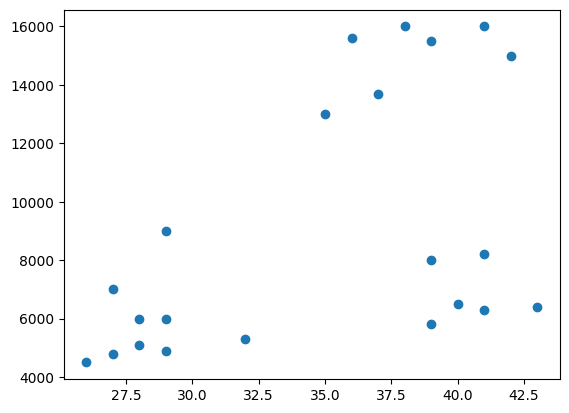

In [8]:
plt.scatter(df['Age'],df['Salary'])

In [11]:
km = KMeans(n_clusters=3 , random_state=42)
X = df.drop(columns='Name')
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
km.labels_

array([2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1],
      dtype=int32)

In [24]:
clusters = km.labels_
df['clusters'] = clusters
df

,Name,Age,Salary,clusters
0,Ines,29,4900,2
1,Omar,32,5300,2
2,Sabrina,40,6500,2
3,Souad,41,6300,2
4,Nezha,43,6400,2
5,Rabia,39,8000,0
6,Soufiane,41,8200,0
7,Abdellah,39,5800,2
8,Mohamed,27,7000,0
9,Yassine,29,9000,0


In [31]:
cluster1 = df[df['clusters']==0]
cluster2 = df[df['clusters']==1]
cluster3 = df[df['clusters']==2]

In [32]:
cluster3

,Name,Age,Salary,clusters
0,Ines,29,4900,2
1,Omar,32,5300,2
2,Sabrina,40,6500,2
3,Souad,41,6300,2
4,Nezha,43,6400,2
7,Abdellah,39,5800,2
14,Zakaria,26,4500,2
15,Fatima,27,4800,2
16,Salim,28,5100,2
17,Imane,29,6000,2


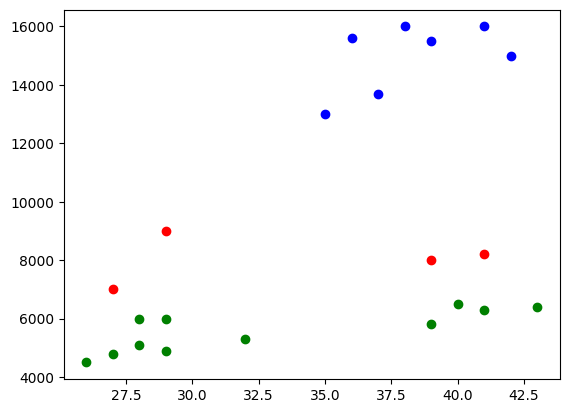

In [34]:
plt.scatter(cluster1['Age'],cluster1['Salary'] , color='red')
plt.scatter(cluster2['Age'],cluster2['Salary'] , color='blue')
plt.scatter(cluster3['Age'],cluster3['Salary'] , color='green')

In [38]:
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_scaled

array([[0.17647059, 0.03478261],
       [0.35294118, 0.06956522],
       [0.82352941, 0.17391304],
       [0.88235294, 0.15652174],
       [1.        , 0.16521739],
       [0.76470588, 0.30434783],
       [0.88235294, 0.32173913],
       [0.76470588, 0.11304348],
       [0.05882353, 0.2173913 ],
       [0.17647059, 0.39130435],
       [0.70588235, 1.        ],
       [0.58823529, 0.96521739],
       [0.52941176, 0.73913043],
       [0.64705882, 0.8       ],
       [0.        , 0.        ],
       [0.05882353, 0.02608696],
       [0.11764706, 0.05217391],
       [0.17647059, 0.13043478],
       [0.11764706, 0.13043478],
       [0.94117647, 0.91304348],
       [0.76470588, 0.95652174],
       [0.88235294, 1.        ]])

In [72]:
estimator = Pipeline(
    [(
        "Scaler" , MinMaxScaler()
    ),
      (
        "clustering" , KMeans(n_clusters=3, random_state=42)
        )
    ]
)
estimator.fit(X)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('clustering', KMeans(n_clusters=3, random_state=42))])

In [73]:
predicted = estimator.predict(X)
df['clusters_2'] = predicted
df

,Name,Age,Salary,clusters,clusters_2
0,Ines,29,4900,2,0
1,Omar,32,5300,2,0
2,Sabrina,40,6500,2,2
3,Souad,41,6300,2,2
4,Nezha,43,6400,2,2
5,Rabia,39,8000,0,2
6,Soufiane,41,8200,0,2
7,Abdellah,39,5800,2,2
8,Mohamed,27,7000,0,0
9,Yassine,29,9000,0,0


In [75]:
cluster11 = df[df['clusters_2']==0]
cluster22 = df[df['clusters_2']==1]
cluster33 = df[df['clusters_2']==2]


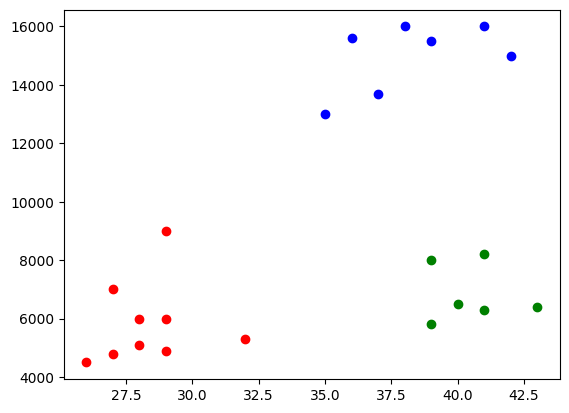

In [76]:
plt.scatter(cluster11['Age'],cluster11['Salary'] , color='red')
plt.scatter(cluster22['Age'],cluster22['Salary'] , color='blue')
plt.scatter(cluster33['Age'],cluster33['Salary'] , color='green')

In [77]:
centroides_scaled = estimator[-1].cluster_centers_
centroides_scaled

array([[0.1372549 , 0.11690821],
       [0.72268908, 0.91055901],
       [0.85294118, 0.2057971 ]])

**Distandardisation**

In [79]:
centroides = estimator[0].inverse_transform(centroides_scaled)
centroides

array([[   28.33333333,  5844.44444444],
       [   38.28571429, 14971.42857143],
       [   40.5       ,  6866.66666667]])

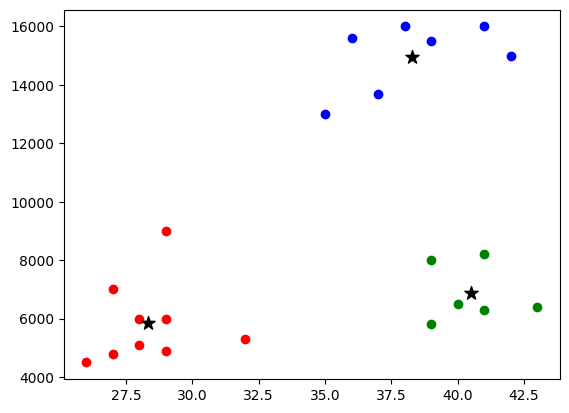

In [80]:
plt.scatter(cluster11['Age'],cluster11['Salary'] , color='red')
plt.scatter(cluster22['Age'],cluster22['Salary'] , color='blue')
plt.scatter(cluster33['Age'],cluster33['Salary'] , color='green')
plt.scatter(centroides[:,0] , centroides[:,1] , color='black' , marker='*' , s=100)

**ELBOW - TO KNOW THE NUMBER OF CLUSTERS - **

In [110]:
SSE = []
SIL = []
k_range = range(2, 10)

for k in k_range:
    estimator = Pipeline([
        ("Scaler", MinMaxScaler()),
        ("clustering", KMeans(n_clusters=k, random_state=42, n_init=10))
    ])

    estimator.fit(X)
    score = estimator[-1].inertia_
    sil = silhouette_score(X , estimator[-1].labels_)
    SIL.append(sil)
    SSE.append(score)


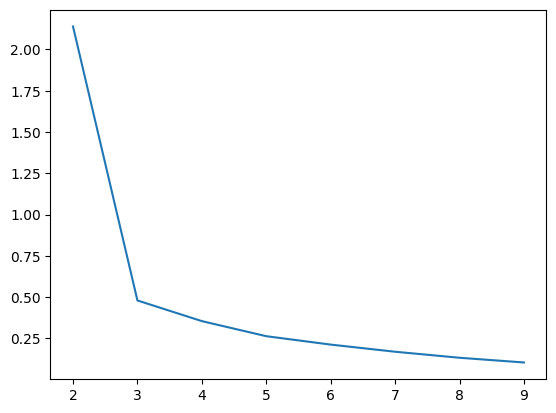

In [111]:
plt.plot(k_range,SSE)

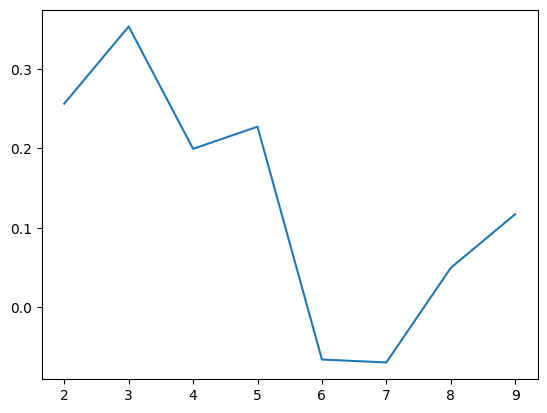

In [112]:
plt.plot(k_range,SIL)